In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
metadata=pd.read_csv('data/movies_data.csv')

# 数据预览

In [3]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 442.2+ KB


In [4]:
metadata.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [5]:
metadata.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


In [6]:
metadata = metadata.reset_index() # 设置每部电影的编号

# 数据分析

### 数据相关性

<AxesSubplot:>

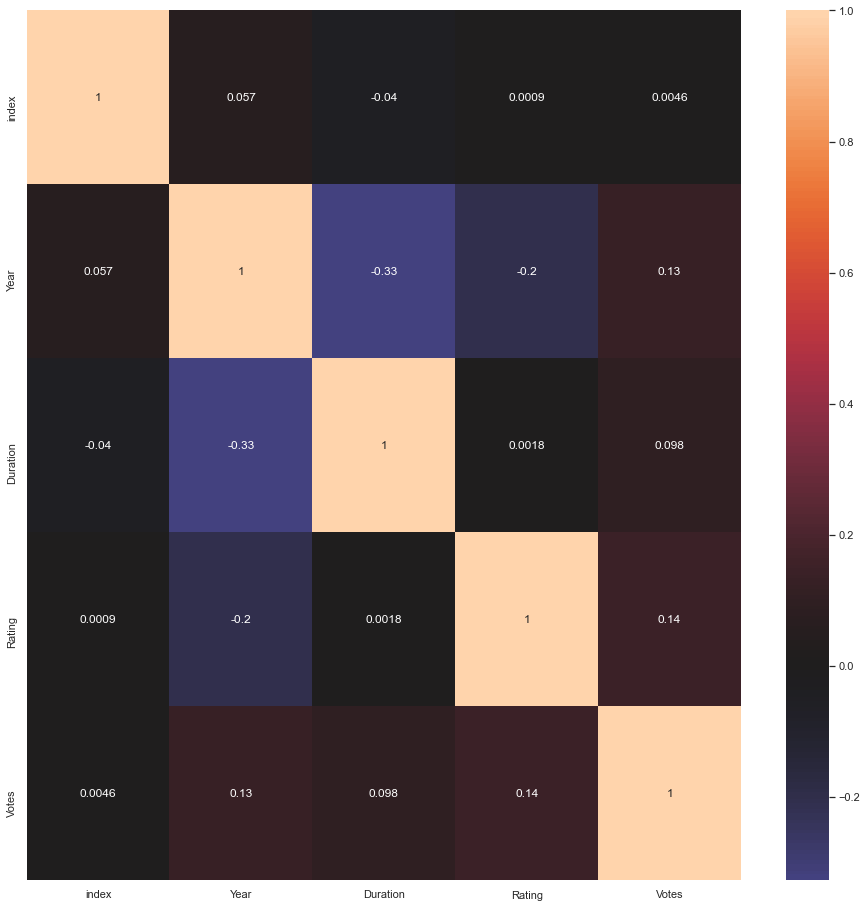

In [7]:
corrs = metadata.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corrs,
             annot=True, # 注入数据
            center = 0)  # 绘制有色数据时将色彩映射居中的值)

### 不同年份电影的数量 

#### 获得相关数据

In [8]:
year_data=metadata.groupby(by='Year')

In [9]:
cnt=0    # 计数
dict1={} # 保存年份
dict2={} # 保存数量
dict3={} # 保存评分的平均分
dict4={} # 保存评分的最大值
dict5={} # 保存评分最大的电影的编号
for gp, data in year_data:
    cnt+=1
    dict1[cnt]=gp
    dict2[cnt]=data.shape[0]
    dict3[cnt]=np.mean(data['Rating'])
    dict4[cnt]=np.max(data['Rating'])
dict_={'year':dict1,'cnt':dict2,'means':dict3,'max':dict4}
movie_num_every_year=pd.DataFrame(dict_)

In [10]:
movie_num_every_year

,year,cnt,means,max
1,1931,2,5.750000,6.2
2,1932,1,6.000000,6.0
3,1933,1,6.200000,6.2
4,1934,2,5.600000,8.5
5,1935,5,5.700000,7.4
...,...,...,...,...
87,2017,211,6.012796,9.0
88,2018,202,6.150495,9.3
89,2019,227,6.265198,9.4
90,2020,140,6.123571,10.0


#### 每年电影的数量

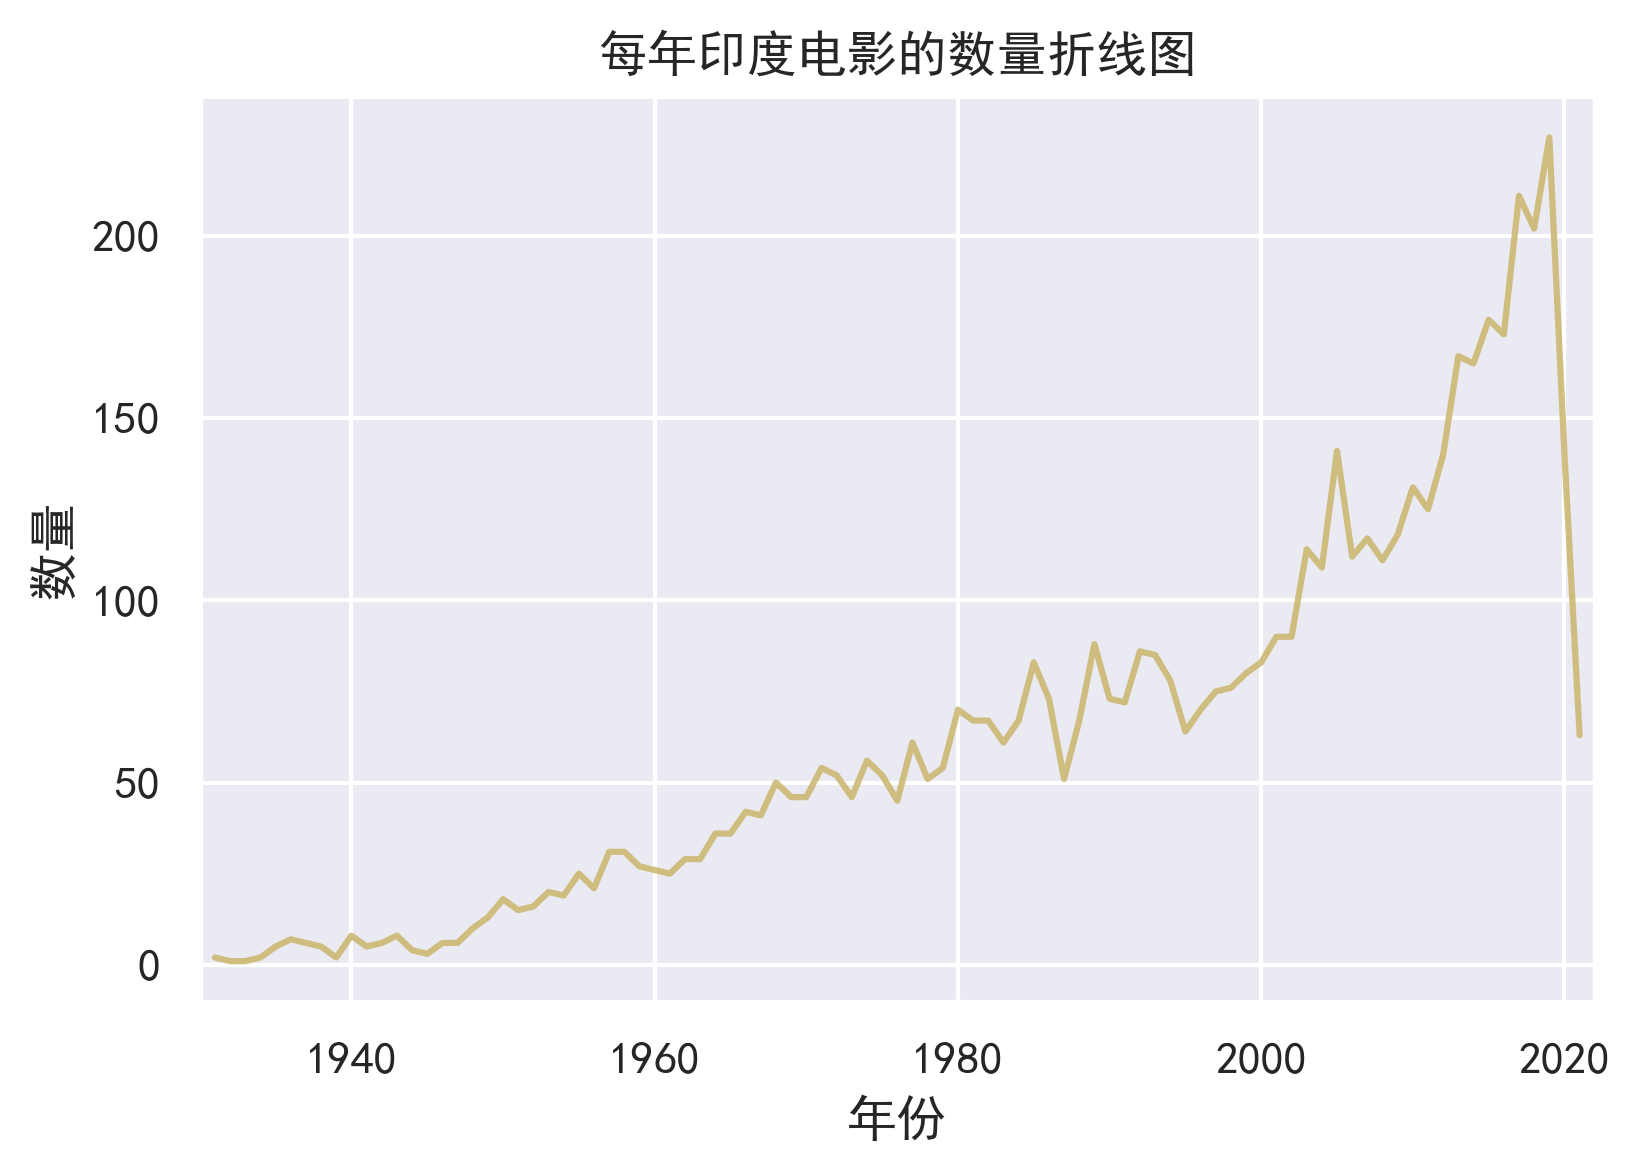

In [11]:
# 在我的 notebook 里，要设置下面两行才能显示中文
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

fig= plt.figure(dpi=300)
plt.rcParams['savefig.dpi'] = 300 #图片像素
x=movie_num_every_year['year'].values
y1=movie_num_every_year['cnt'].values
plt.plot(x,y1,c='y',marker='',alpha=0.9)
plt.xlim(1930,2022)
plt.title("每年印度电影的数量折线图")
plt.xlabel("年份")
plt.ylabel("数量")
plt.savefig("每年电影数量.jpg")

### top movies

In [12]:
dict_={}
for gp,data in year_data: # 获得数据
    data.sort_values(by=['Rating','Votes'],ascending=[False,False],inplace=True) # 排序：先以评分，再是投票
    dict_[gp]=data.iloc[0,:]
top_movies=pd.DataFrame(dict_)
top_movies = top_movies.T
top_movies.columns=metadata.columns

In [13]:
top_movies

,index,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1931,5144,The Light of the World,1931,124,"Drama, Fantasy",6.2,112,Ardeshir Irani,Master Vithal,Zubeida,Jillo
1932,2293,Indrasabha,1932,211,"Musical, Romance",6.0,12,J.J. Madan,Nissar,Jehanara Kajjan,Abdul Rehman Kabuli
1933,1736,Fate,1933,68,"Drama, Romance",6.2,12,John Hunt,Devika Rani,Himanshu Rai,Abraham Sofaer
1934,3366,Mazdoor,1934,155,Drama,8.5,6,Mohan Dayaram Bhavnani,Bibbo,S.B. Nayampalli,Paidi Jairaj
1935,2299,Inquilab,1935,144,Drama,7.4,38,Debaki Bose,Durga Khote,Prithviraj Kapoor,Syed Mohammed
...,...,...,...,...,...,...,...,...,...,...,...
2017,4319,Rediscovering India,2017,124,Documentary,9.0,62,Meenal Dixit,Benny John,Benny John,Meenal Dixit
2018,536,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
2019,1897,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
2020,3146,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


In [14]:
type_of_top_movies=dict() # 获得电影的类型及其相应的电影数量
for ty in top_movies['Genre'].values:
    ls=ty.split(', ') # 拆分字符串，获得电影类型
    for i in ls: # 记录
        if i in type_of_top_movies.keys():
            type_of_top_movies[i]+=1
        else:
            type_of_top_movies[i]=1
type_of_top_movies=pd.Series(type_of_top_movies) # 转化为Serise格式

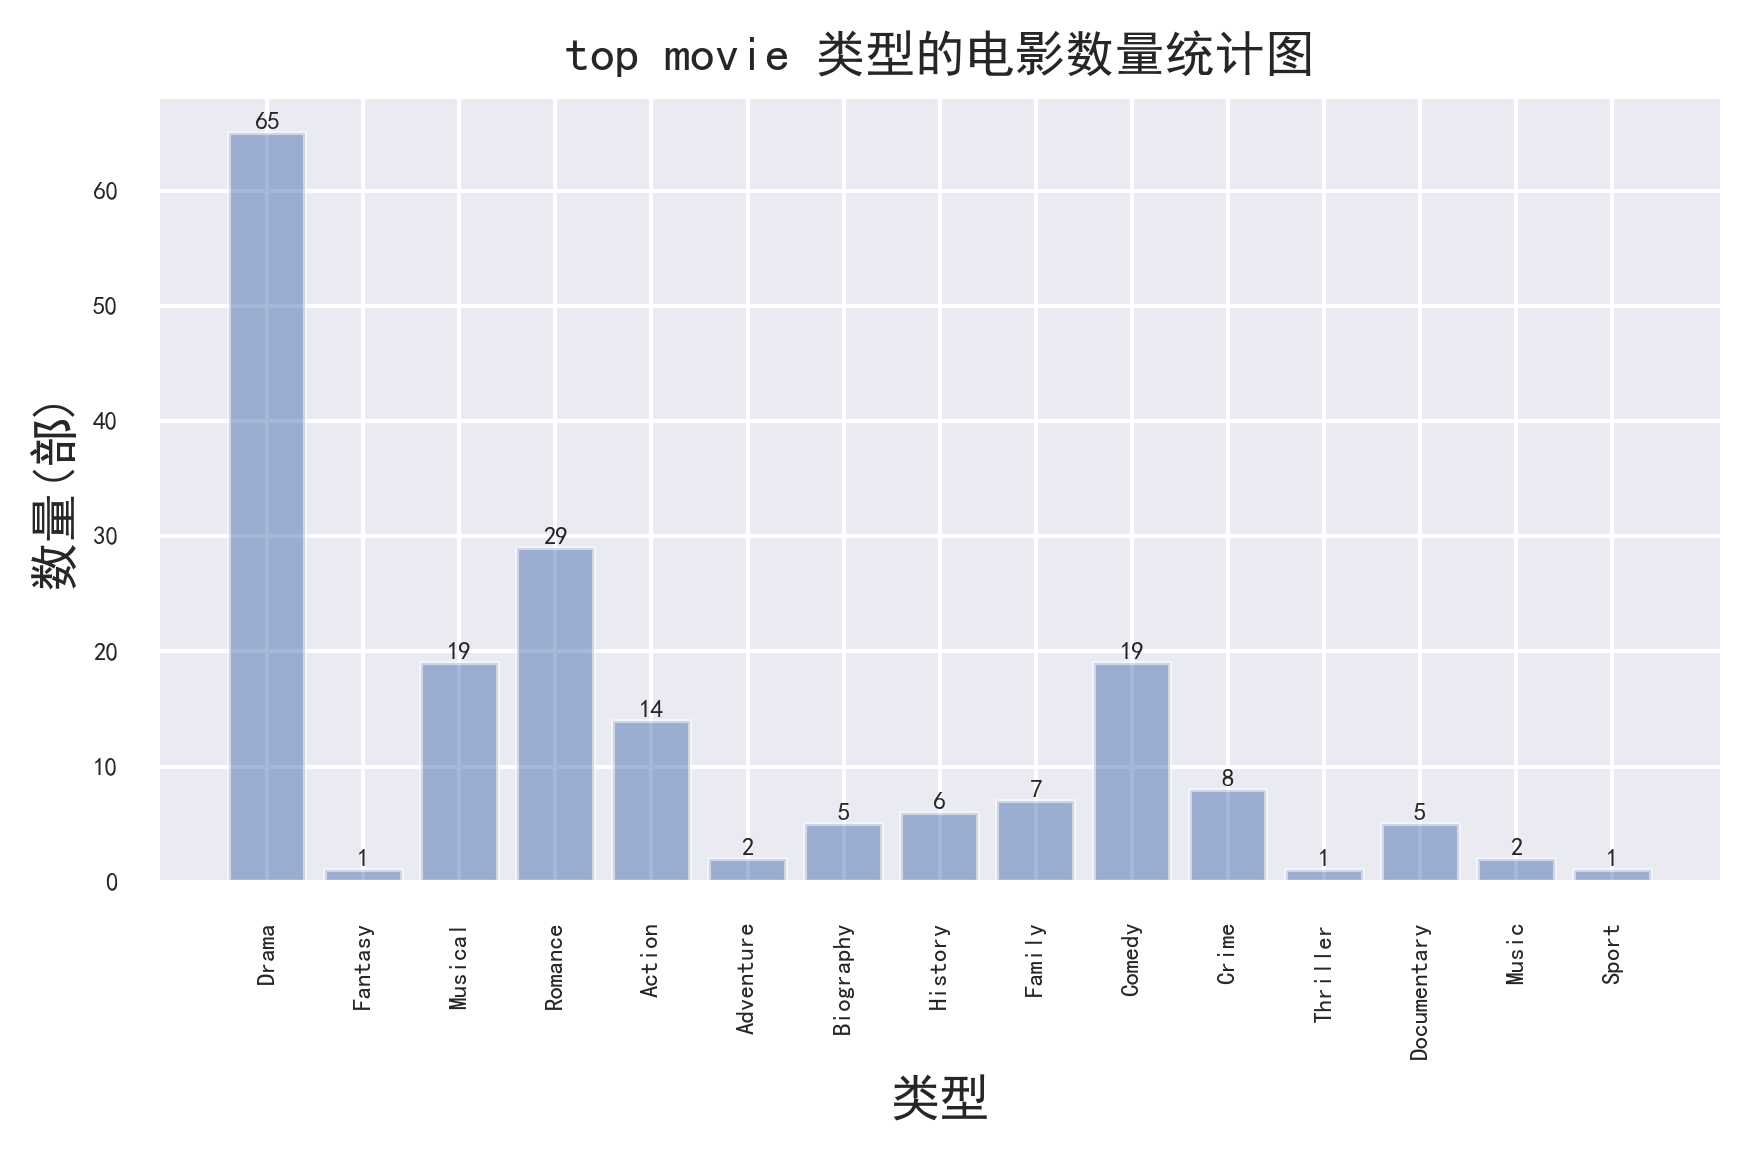

In [15]:
fig= plt.figure(dpi=300) # 图片像素
plt.bar(type_of_top_movies.keys(),type_of_top_movies.values,color='b',alpha=0.5)
for a,b in zip(type_of_top_movies.keys(),type_of_top_movies.values):
    plt.text(a, b, '%s' % b, ha='center', va= 'bottom',fontsize=6)
plt.title("top movie 类型的电影数量统计图")
plt.xticks(size=6,rotation=90)
plt.yticks(size=6)
plt.xlabel("类型")
plt.ylabel("数量(部)")
plt.tight_layout() # 可以使之完整保存图像
plt.savefig("top_movie类型的电影数量.jpg")

## 导演

### 各个导演的电影的平均评分

In [16]:
director_gb=metadata.groupby(by='Director')
director_rating_mean={}
director_num={}
for gp, data in director_gb:
    director_rating_mean[gp]=data['Rating'].mean()
    director_num[gp]=data.shape[0]
director_num=pd.Series(director_num)
director_rating_mean=pd.Series(director_rating_mean)
director_=pd.concat([director_num,director_rating_mean],axis=1)

In [17]:
dir_sorted=director_.sort_values([0,1],ascending=[False,False])

### 统计导演7分以上的电影数量

In [18]:
data_tem=metadata[metadata['Rating']>=7]

In [19]:
dir_gb=data_tem.groupby(by='Director')
dir_high_rating_num={}
dir_high_rating_mean={}
for gp,data in dir_gb:
    dir_high_rating_num[gp]=data.shape[0]
    dir_high_rating_mean[gp]=data['Rating'].mean()
dir_high_rating_num=pd.Series(dir_high_rating_num)
dir_high_rating_mean=pd.Series(dir_high_rating_mean)
dir_high_rating=pd.concat([dir_high_rating_num,dir_high_rating_mean],axis=1)

In [20]:
dir_high_rating.sort_values(0,ascending=False,inplace=True)
dir_high_rating=dir_high_rating.head(20)

<ipython-input-46-e19b5cb73dec>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(dir_high_rating.index),size=4,rotation=90)


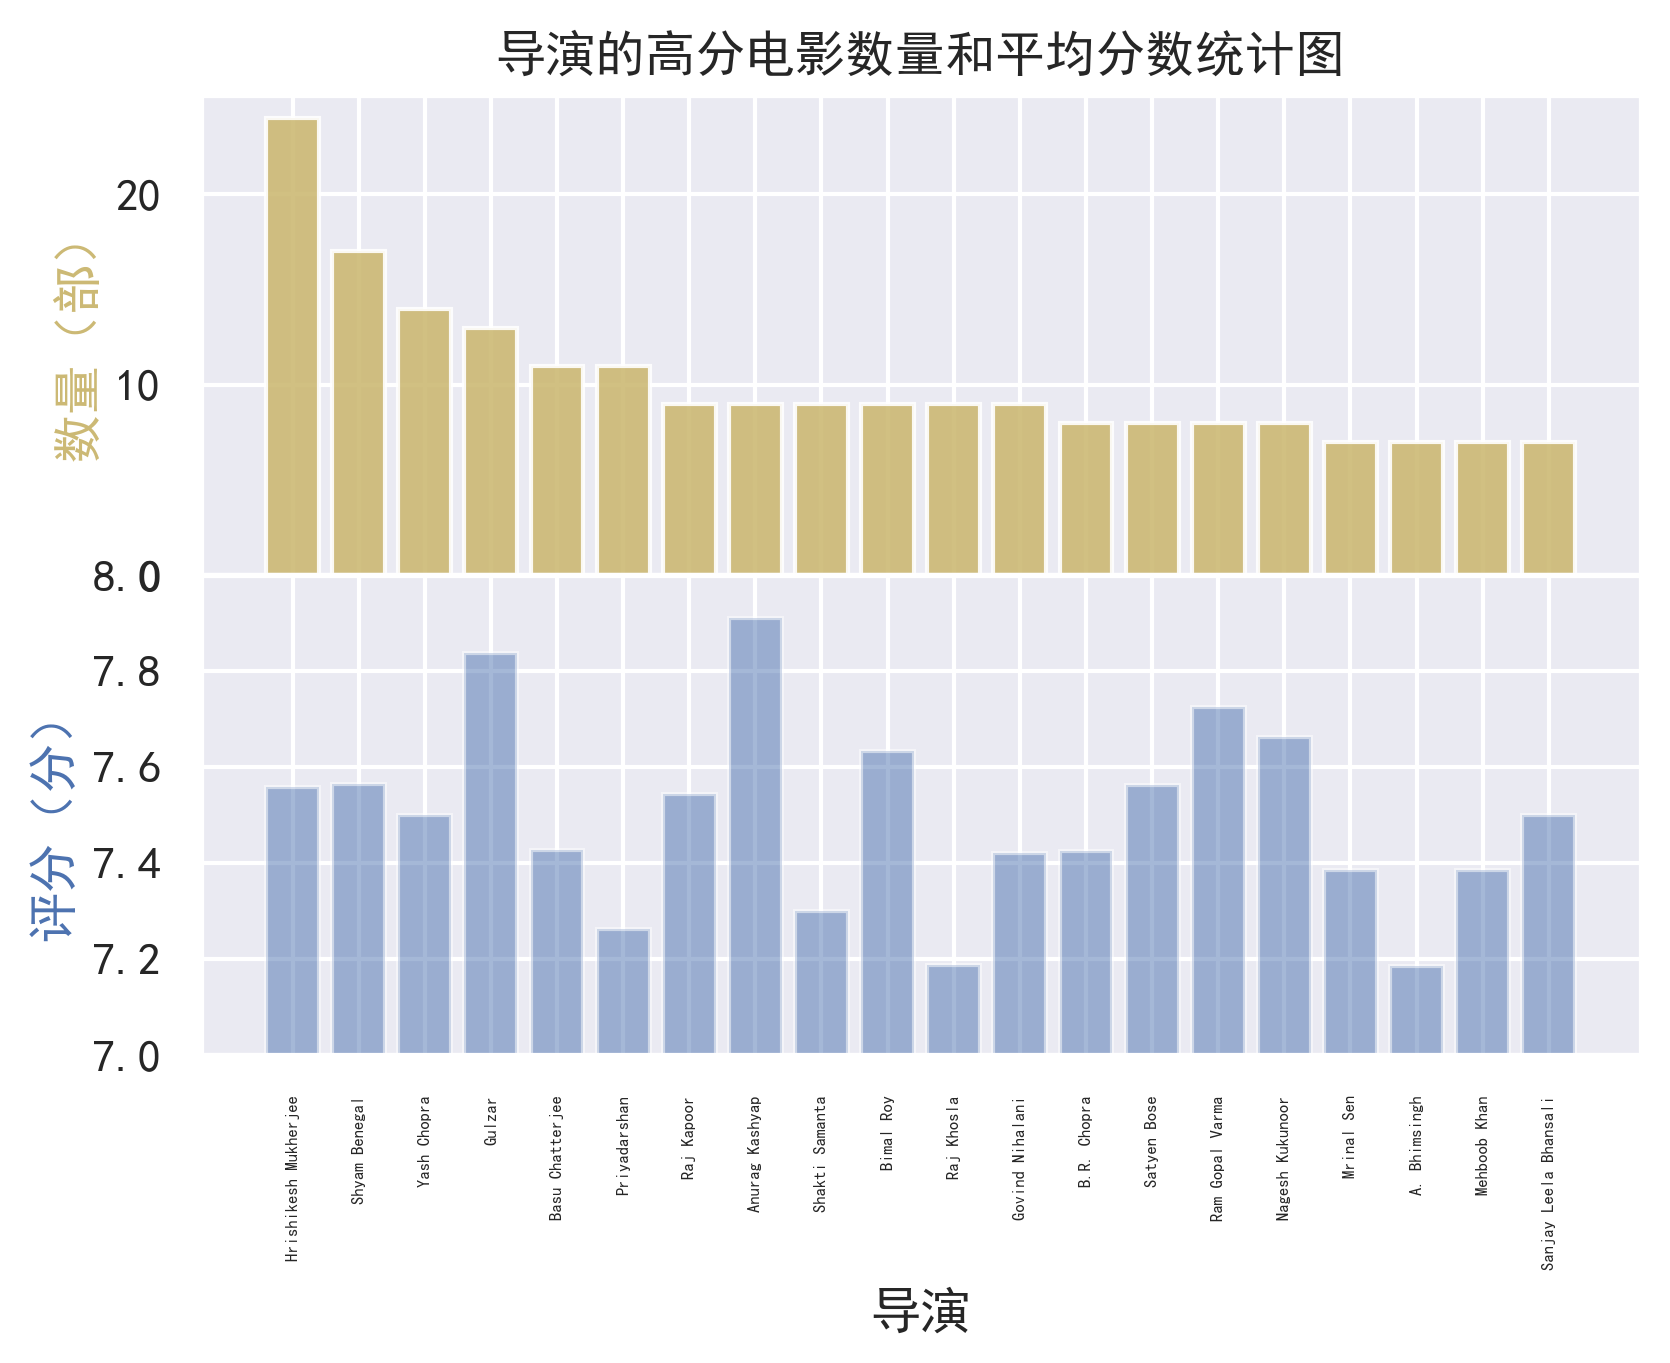

In [46]:
fig=plt.figure(dpi=300) # 定义画布
ax1=fig.add_axes([0.1,0.5,0.8,0.4],xticklabels=[]) # 增加 ax 并说明位置
ax2=fig.add_axes([0.1,0.1,0.8,0.4])
ax1.bar(list(dir_high_rating.index),list(dir_high_rating[0].values),color='y',alpha=0.9) # 透明的为0.9
ax2.bar(list(dir_high_rating.index),list(dir_high_rating[1].values),color='b',alpha=0.5)
ax2.set_ylim(7,8) # 限制y轴范围
ax2.set_xlabel("导演")
ax2.set_xticklabels(list(dir_high_rating.index),size=4,rotation=90)
ax1.set_ylabel("数量（部）",color='y')
ax2.set_ylabel("评分（分）",color='b')
ax1.set_title('导演的高分电影数量和平均分数统计图')
plt.savefig('导演的高分电影数量和平均分数统计图.jpg',dpi=300) 

### 7分以上电影演员统计图

In [23]:
actor_name=data_tem.loc[:,['Actor 1','Actor 2','Actor 3']].values
actor_cnt={}
for strs in actor_name:
    for str in strs:
        if str in actor_cnt.keys():
            actor_cnt[str]+=1
        else:
            actor_cnt[str]=1
actor_cnt=pd.Series(actor_cnt)

In [48]:
actor_cnt.sort_values(ascending=False).head()

Amitabh Bachchan    49
Ashok Kumar         38
Shabana Azmi        38
Naseeruddin Shah    37
Shashi Kapoor       35
dtype: int64

In [25]:
actor_reg={"1":actor_cnt[actor_cnt<=1].shape[0],
            "2":actor_cnt[actor_cnt==2].shape[0],
            "3":actor_cnt[actor_cnt==3].shape[0],
            "4":actor_cnt[actor_cnt==4].shape[0],
            "5":actor_cnt[actor_cnt==5].shape[0],
            "5-10":actor_cnt[(actor_cnt>5) & (actor_cnt<=10)].shape[0],
            "10-20":actor_cnt[(actor_cnt>10) & (actor_cnt<=20)].shape[0],
            ">20":actor_cnt[actor_cnt>=20].shape[0]}

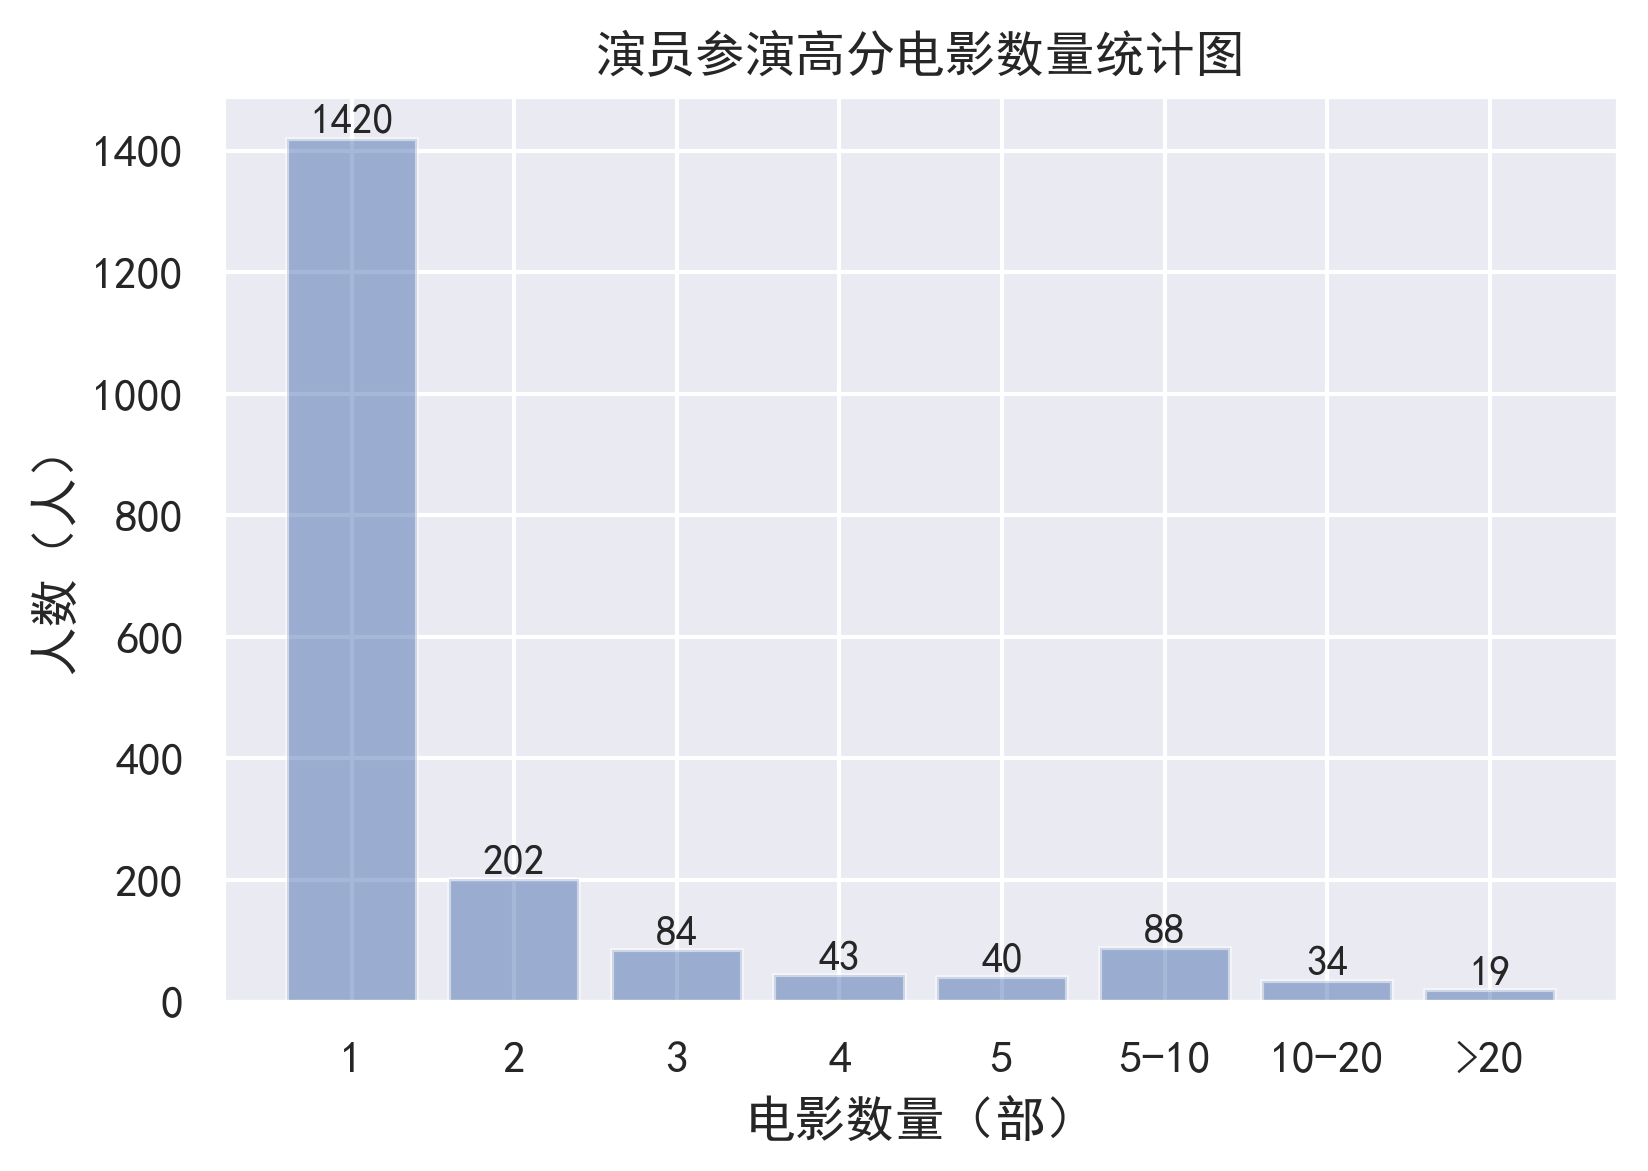

In [26]:
plt.figure(dpi=300)
plt.bar(actor_reg.keys(),actor_reg.values(),color='b',alpha=0.5)
for a,b in zip(actor_reg.keys(),actor_reg.values()):
    plt.text(a, b, '%s' % b, ha='center', va= 'bottom',fontsize=10)
plt.title("演员参演高分电影数量统计图")
plt.xlabel('电影数量（部）')
plt.ylabel('人数（人）')
plt.savefig("演员参演高分电影数量统计图.jpg")

<ipython-input-41-245218beee2f>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1=fig.add_axes([0.1,0.5,0.8,0.4],xticklabels=[],yticklabels=['','0.25','0.50','0.75','1.00'])


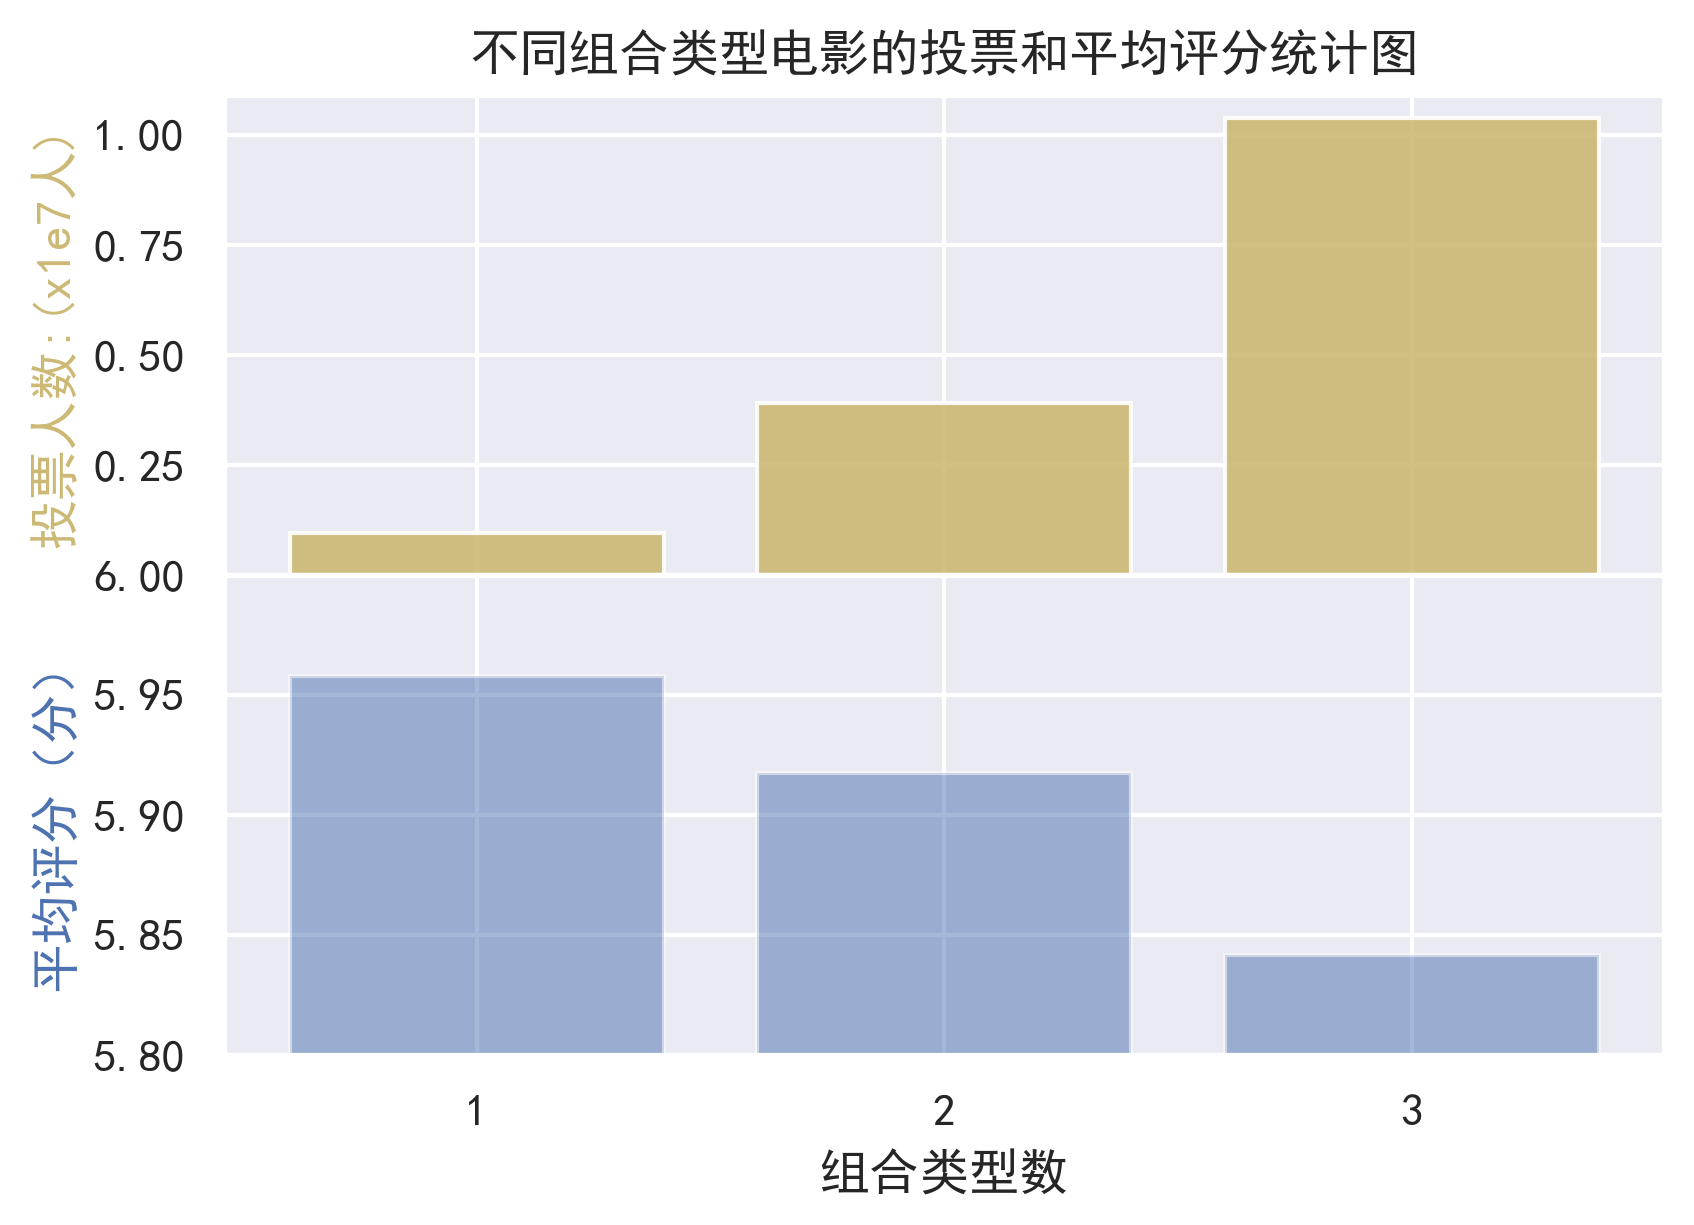

In [41]:
fig=plt.figure(dpi=300) # 定义画布
ax1=fig.add_axes([0.1,0.5,0.8,0.4],xticklabels=[],yticklabels=['','0.25','0.50','0.75','1.00']) # 增加 ax 并说明位置
ax2=fig.add_axes([0.1,0.1,0.8,0.4],ylim=(5.8,6))
ax1.bar(list(arr1.keys()),list(arr1.values),color='y',alpha=0.9) # 透明的为0.9
ax2.bar(list(arr2.keys()),list(arr2.values),color='b',alpha=0.5)
ax1.set_xticks([1,2,3])
ax2.set_xticks([1,2,3])
ax2.set_xlabel('组合类型数')
ax1.set_ylabel("投票人数:(x1e7人)",color='y')
ax2.set_ylabel("平均评分（分）",color='b')
ax1.set_title('不同组合类型电影的投票和平均评分统计图')
plt.savefig('不同组合类型电影的投票和平均评分统计图.jpg',dpi=300) # 保存